# In this notebook I will use some classification methods to predict strokes.

#### Data from: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE


In [2]:
data = pd.read_csv('C:/Users/kacpe/Desktop/stroke.csv')
data.drop('id', axis = 1, inplace = True)
print(data.shape)
data.head()

(5110, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


There are 201 missing values in the BMI column so we will replace them with mean of the column.

In [4]:
data.bmi.replace(to_replace = np.nan, value = data.bmi.mean(), inplace = True)

In [5]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
# Checking statistical parameters
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


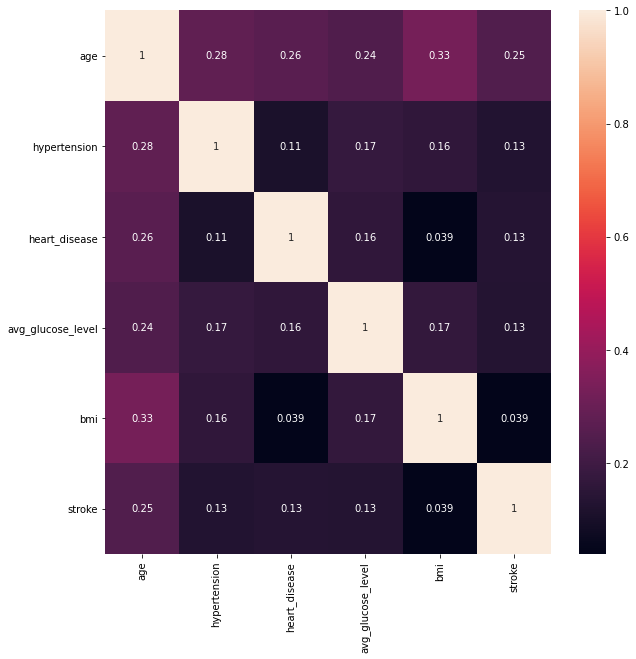

In [8]:
# Checking correlation scores on heatmap
plt.figure(figsize = (10,10))
sns.heatmap(data = data.corr(), annot = True)
plt.show()

Variables are almost not correlated, highest score is between BMI and age.

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


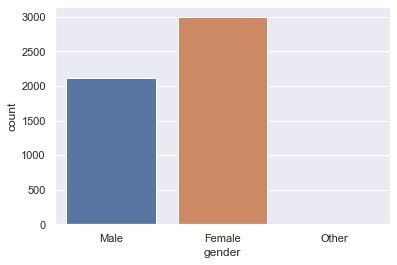

In [9]:
print(data.gender.value_counts())
sns.set_theme(style = "darkgrid")
ax = sns.countplot(data = data, x = "gender")
plt.show()

40% of our population are males, so models may be more precise in classifying women.

0    4612
1     498
Name: hypertension, dtype: int64


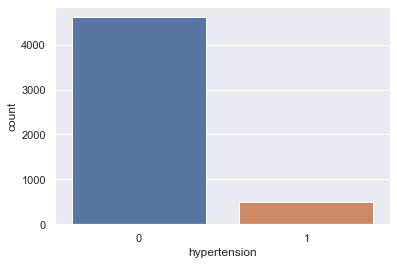

In [10]:
print(data.hypertension.value_counts())
sns.set_theme(style = "darkgrid")
ax = sns.countplot(data = data, x = "hypertension")
plt.show()

Barely 500 people in database have got hypertension

Yes    3353
No     1757
Name: ever_married, dtype: int64


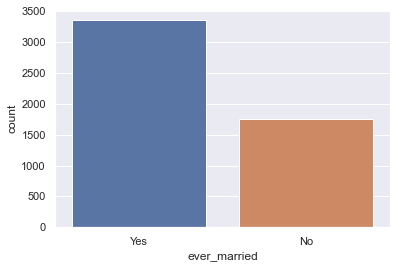

In [11]:
print(data.ever_married.value_counts())
sns.set_theme(style = "darkgrid")
ax = sns.countplot(data = data, x = "ever_married")
plt.show()

2/3 of our examinated are or were married.

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


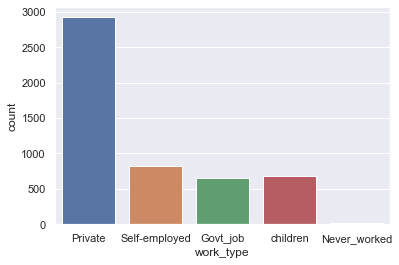

In [12]:
print(data.work_type.value_counts())
sns.set_theme(style = "darkgrid")
ax = sns.countplot(data = data, x = "work_type")
plt.show()

Significant percent of examinated people work in private sector. It may means that they live sedentary lifestyle.

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


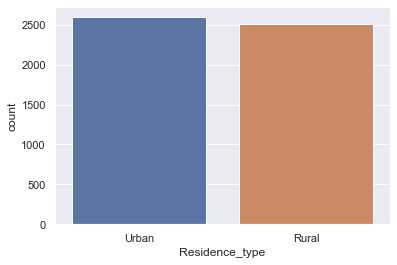

In [13]:
print(data.Residence_type.value_counts())
sns.set_theme(style = "darkgrid")
ax = sns.countplot(data = data, x = "Residence_type")
plt.show()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


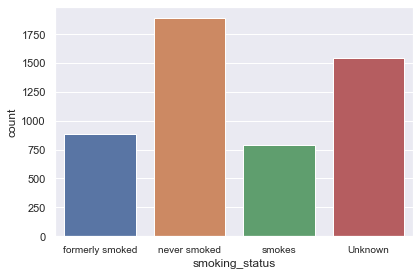

In [14]:
print(data.smoking_status.value_counts())
sns.set_theme(style = "darkgrid")
ax = sns.countplot(data = data, x = "smoking_status")
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 10)
plt.tight_layout()
plt.show()

### Data preprocessing

Creating dependent and independent variables.

In [15]:
x = data.drop('stroke', axis = 1)
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked


In [16]:
y = data['stroke']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

Changing variables from categorical type to numerical, what is neccesary to use them in modeling later.

In [17]:
x['ever_married'].replace(to_replace = ['Yes', 'No'], value = [1, 0], inplace = True )
x['Residence_type'].replace(to_replace = ['Urban', 'Rural'], value = [1, 0], inplace = True)
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked
1,Female,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked
2,Male,80.0,0,1,1,Private,0,105.92,32.500000,never smoked
3,Female,49.0,0,0,1,Private,1,171.23,34.400000,smokes
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked


In [18]:
columnTrans = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0, 5, 9])], remainder = 'passthrough')
x = np.array(columnTrans.fit_transform(x))
x

array([[  0.        ,   1.        ,   0.        , ...,   1.        ,
        228.69      ,  36.6       ],
       [  1.        ,   0.        ,   0.        , ...,   0.        ,
        202.21      ,  28.89323691],
       [  0.        ,   1.        ,   0.        , ...,   0.        ,
        105.92      ,  32.5       ],
       ...,
       [  1.        ,   0.        ,   0.        , ...,   0.        ,
         82.99      ,  30.6       ],
       [  0.        ,   1.        ,   0.        , ...,   0.        ,
        166.29      ,  25.6       ],
       [  1.        ,   0.        ,   0.        , ...,   1.        ,
         85.28      ,  26.2       ]])

In [19]:
print(x.shape)
print(y.shape)

(5110, 19)
(5110,)


Splitting data into training and testing samples. We will use 80% of data to train models.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4088, 19)
(4088,)
(1022, 19)
(1022,)


Standarizing data for better perfomrance.

In [21]:
standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)

Creating models and evaluation parameters.

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score
from sklearn.model_selection import cross_val_score

In [23]:
list = []
list.append(['Logistic Regreesion', LogisticRegression(C = 0.1)])
list.append(['SVM', SVC()])
list.append(['KNeighbors', KNeighborsClassifier()])
list.append(['Decision Tree', DecisionTreeClassifier(criterion = 'entropy')])
list.append(['Random Forest', RandomForestClassifier(criterion = 'entropy')])

list_1= []

for i in range(len(list)):
    list_2= []
    model = list[i][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confm = confusion_matrix(y_test, y_pred)
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10) 
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred) 
    print(list[i][0],':')
    print(confm)
    print("")
    list_2.append(list[i][0])
    list_2.append((accuracy_score(y_test, y_pred))*100) 
    list_2.append(accuracies.mean()*100)
    list_2.append(accuracies.std()*100)
    list_2.append(precision)
    list_2.append(f1)
    list_1.append(list_2)

C:\Users\kacpe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regreesion :
[[968   0]
 [ 54   0]]



C:\Users\kacpe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM :
[[968   0]
 [ 54   0]]

KNeighbors :
[[966   2]
 [ 53   1]]

Decision Tree :
[[936  32]
 [ 49   5]]

Random Forest :
[[967   1]
 [ 53   1]]



In [24]:
validationFrame = pd.DataFrame(list_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'Precision', 'F1'])
validationFrame.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
validationFrame

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,Precision,F1
0,Logistic Regreesion,94.716243,95.229997,0.120037,0.000000,0.000000
1,SVM,94.716243,95.229997,0.120037,0.000000,0.000000
4,Random Forest,94.716243,95.205307,0.316262,0.500000,0.035714
2,KNeighbors,94.618395,94.911909,0.343037,0.333333,0.035088
3,Decision Tree,92.074364,90.998010,1.030659,0.135135,0.109890


We can see that our modesl are overfitted so let's try to use SMOTE( Synthetic Minority Oversampling Technique ), which is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

In [25]:
SM= SMOTE(random_state=2)
X_train, y_train = SM.fit_resample(X_train, y_train.ravel())

In [26]:
list = []
list.append(['Logistic Regreesion', LogisticRegression(C = 0.1)])
list.append(['SVM', SVC()])
list.append(['KNeighbors', KNeighborsClassifier()])
list.append(['Decision Tree', DecisionTreeClassifier(criterion = 'entropy')])
list.append(['Random Forest', RandomForestClassifier(criterion = 'entropy')])

list_1= []

for i in range(len(list)):
    list_2= []
    model = list[i][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    confm = confusion_matrix(y_test, y_pred)
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10) 
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred) 
    print(list[i][0],':')
    print(confm)
    print("")
    list_2.append(list[i][0])
    list_2.append((accuracy_score(y_test, y_pred))*100) 
    list_2.append(accuracies.mean()*100)
    list_2.append(accuracies.std()*100)
    list_2.append(precision)
    list_2.append(f1)
    list_1.append(list_2)

Logistic Regreesion :
[[748 220]
 [ 15  39]]

SVM :
[[794 174]
 [ 32  22]]

KNeighbors :
[[837 131]
 [ 36  18]]

Decision Tree :
[[901  67]
 [ 45   9]]

Random Forest :
[[923  45]
 [ 48   6]]



In [27]:
validationFrame = pd.DataFrame(list_1, columns= ['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std. Deviation', 'Precision', 'F1'])
validationFrame.sort_values(by= ['Accuracy', 'K-Fold Mean Accuracy'], inplace= True, ascending= False)
validationFrame

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,Precision,F1
4,Random Forest,90.900196,95.864582,1.715938,0.117647,0.114286
3,Decision Tree,89.041096,90.984289,3.136104,0.118421,0.138462
2,KNeighbors,83.659491,90.765631,0.866181,0.120805,0.177340
1,SVM,79.843444,88.363831,1.536875,0.112245,0.176000
0,Logistic Regreesion,77.005871,79.411545,1.448506,0.150579,0.249201


We can see that after using SMOTE the best model is Random forest with 91% accuracy.